In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.shape

(42000, 785)

In [5]:
test_data=pd.read_csv('test.csv')

In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data.shape

(28000, 784)

In [13]:
train_data.shape

(42000, 785)

In [14]:
def showimage(row_num):
    a=train_data.iloc[row_num,1:].values
    a=a.reshape(28,28).astype('uint8')
    plt.imshow(a)

<IPython.core.display.Javascript object>


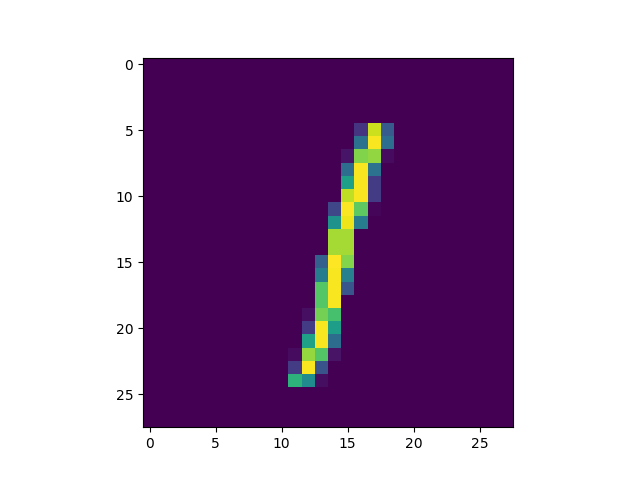

In [15]:
showimage(15)

In [16]:
from sklearn.cross_validation import train_test_split

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
X_train,X_test,y_train,y_test=train_test_split(train_data.iloc[:,1:],train_data.iloc[:,0],random_state=7)

In [19]:
rfc=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [21]:
y_predict=rfc.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [23]:
accuracy_score(y_test,y_predict)

0.96476190476190471

## Lets do gridsearch to find best number of trees in random forrest model

In [24]:
from sklearn.grid_search import GridSearchCV

D:\anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
param_grid={'n_estimators':[10,100,500,1000] }

In [38]:
grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=10,scoring='accuracy')

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [40]:
grid.grid_scores_

[mean: 0.93454, std: 0.00307, params: {'n_estimators': 10},
 mean: 0.96235, std: 0.00242, params: {'n_estimators': 100},
 mean: 0.96413, std: 0.00223, params: {'n_estimators': 500},
 mean: 0.96470, std: 0.00240, params: {'n_estimators': 1000}]

In [41]:
rfc=RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)

In [42]:
y_predict=rfc.predict(X_test)
accuracy_score(y_test,y_predict)

0.96733333333333338

## Lets use Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
gbc=GradientBoostingClassifier().fit(X_train,y_train)
# seems to not convering!!! Bad choice

KeyboardInterrupt: 

In [40]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Lets use neural networks

In [16]:
from sklearn.neural_network import MLPClassifier

In [ ]:
param_grid={'activation':[10,100,500,1000] }

In [35]:
# Lets start with default settings. To use is as benchmark
nn=MLPClassifier().fit(X_train,y_train)

In [36]:
y_predict_nn=nn.predict(X_test)

In [41]:
print('Accuracy of MLPClassifier with default settings is:')
print(accuracy_score(y_test,y_predict))

Accuracy of MLPClassifier with default settings is:
0.965142857143


In [48]:
nn3=MLPClassifier(hidden_layer_sizes=(1000, 500, 300,200,100)).fit(X_train,y_train)

In [53]:
y_predict_nn=nn3.predict(X_test)
print('Accuracy of MLPClassifier with 3 layer[200,100,500] settings is:')
print(accuracy_score(y_test,y_predict))

Accuracy of MLPClassifier with 3 layer[200,100,500] settings is:
0.965142857143


In [67]:
nn3.hidden_layer_sizes

10

In [65]:
# Lets just try to use 10 neurons
nn4=MLPClassifier(hidden_layer_sizes=[10],max_iter=1000,activation='relu').fit(X_train,y_train)

In [68]:
y_predict_nn4=nn4.predict(X_test)
print('Accuracy of MLPClassifier with 1 layer, 10 neurons  settings is:')
print(accuracy_score(y_test,y_predict_nn4))

Accuracy of MLPClassifier with 1 layer, 10 neurons  settings is:
0.870095238095
